# TP1a - Génération de variables aléatoires (Première partie)

## Estimation avancée - G3 SDIA

Dans ce TP, on s'intéresse à la génération de variables aléatoires, i.e., la capacité de produire des échantillons finis de variables ou vecteurs aléatoires d'une loi donnée. On suppose que l'on dispose d'un générateur de loi uniforme sur $[0,1]$ (avec Numpy, il est donné par $\texttt{np.random.rand}$). À partir de ce générateur, le but de ce TP sera de générer des échantillons d'autres lois, avec des méthodes simples, notamment la méthode de la *transformée inverse*. Des méthodes plus sophistiquées (acceptation-rejet, échantillonnage d'importance) seront présentées et étudiées à la séance suivante (après les vacances). Ce sera le sujet du TP-1b.

Pour chaque question, justifier la solution puis l'implémenter. Comparer avec la densité théorique à l'aide d'histogrammes ou de *kernel density estimates*.

### Instructions

1. Renommer votre notebook sous la forme `tp1a_Nom1_Nom2.ipynb`, et inclure le nom du binôme dans le notebook. 

2. Votre code, ainsi que toute sortie du code, doivent être commentés !

3. Déposer votre notebook sur Moodle dans la section prévue à cet effet avant la date limite : 8 Novembre 2023, 23h59.

>Notebook tu TP1a, binôme: Benichou - Bonnefoy

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KernelDensity

### Partie 1 - Pour s'échauffer : lois uniformes

**Q1**. À partir de $N$ échantillons d'une loi uniforme sur l'intervalle $[0,1]$, comment obtenir $N$ échantillons d'une loi uniforme sur l'intervalle $[a,b]$ ?

Il faut multiplier par $b-a$ chaque échantillon.

(array([0.40197545, 0.38522647, 0.31823056, 0.38522647, 0.41872442,
        0.40197545, 0.40197545, 0.38522647, 0.4354734 , 0.25123465,
        0.23448568, 0.35172852, 0.33497954, 0.36847749, 0.30148159,
        0.26798363, 0.35172852, 0.35172852, 0.38522647, 0.35172852,
        0.26798363, 0.31823056, 0.25123465, 0.23448568, 0.28473261,
        0.40197545, 0.36847749, 0.36847749, 0.28473261, 0.4354734 ,
        0.33497954, 0.4354734 , 0.30148159, 0.26798363, 0.30148159,
        0.26798363, 0.31823056, 0.31823056, 0.28473261, 0.28473261,
        0.41872442, 0.25123465, 0.2177367 , 0.36847749, 0.41872442,
        0.33497954, 0.35172852, 0.33497954, 0.33497954, 0.30148159]),
 array([0.01389607, 0.07360121, 0.13330635, 0.19301149, 0.25271663,
        0.31242176, 0.3721269 , 0.43183204, 0.49153718, 0.55124232,
        0.61094746, 0.6706526 , 0.73035774, 0.79006288, 0.84976802,
        0.90947315, 0.96917829, 1.02888343, 1.08858857, 1.14829371,
        1.20799885, 1.26770399, 1.32740913, 1.

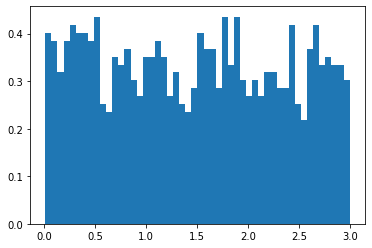

In [2]:
b=5
a=2
np.random.seed(42)
#generate number between one and zero ten times
N=np.random.random(1000)

X=(b-a)*N
plt.hist(X, bins=50, density=True)

**Q2**. Comment obtenir $N$ échantillons d'une loi uniforme sur le pavé $[a,b] \times [c,d]$ ?

---- Votre réponse ici ----

In [3]:
#####
### YOUR CODE HERE
#####

**Q3**. À partir de $N$ échantillons de loi uniforme sur l'intervalle $[0,1]$, comment obtenir $N$ échantillon de loi uniforme discrète sur $\{1, ..., K\}$ ?

---- Votre réponse ici ----

In [4]:
#####
### YOUR CODE HERE
#####

### Partie 2 - Méthode de la transformée inverse

Soit $X$ une variable aléatoire réelle de fonction de répartition $F$ (rappel : $F$ est une fonction croissante de $\mathbb{R}$ dans $[0,1]$, et "càdlàg" (continu à droite et limite à gauche), mais pas nécessairement bijective). On définit la **fonction inverse généralisée** $F^{-1}$ de $F$ par :
$$\forall~u \in [0,1], F^{-1}(u) = \inf\{x \in \mathbb{R}, F(x) \geq u\}.$$

Cette fonction conïncide avec l'inverse classique quand $F$ est bijective (attention même si $F$ est continue elle n'est pas nécessairement bijective, il peut y avoir des plateaux).

**Q1**. Montrer la proposition suivante :

Si $U$ suit la loi uniforme sur l'intervalle $[0,1]$, alors la v.a. $F^{-1}(U)$ a pour fonction de répartition $F$ (et donc la même loi que $X$).

Cela donne donc la méthode de la **transformée inverse** ; Si l'on connait explicitement la fonction $F^{-1}$, on peut simuler de n'importe quelle variable aléatoire à partir d'un échantillon de loi uniforme.

> $F_X(x)$=$P(X≤x)$. Nous voulons exprimer cette probabilité en termes de U et F.
>
> (on pourrait se restraine au cas où F continu)
>
> On a $P(X≤x)$=$P(F^{−1}(U)$≤$x$) . De plus, comme F est une fonction monotone non décroissante, $F^{−1}$(U) <= $x$ ssi $U$≤$F(x)$
>
> Donc, nous pouvons réécrire l'expression précédente comme : $P(F^{−1}≤x)$=$P$($U$≤$F(x))$
>
> U suit une distribution uniforme sur [0,1], donc P(U≤F(x))=F(x) pour 0 <= F(X) <= 1.
> 
> $F_X(x)$=$P(X≤x)$=$F(x)$
>
> Ce qui signifie que la v.a. X=$F^{−1}(U)$ a pour fonction de répartition F, et donc la même loi que X.
> 
> Ainsi, la méthode de la transformée inverse est validée : en connaissant explicitement la fonction $F^{−1}$, on peut simuler n'importe quelle variable aléatoire à partir d'un échantillon de loi uniforme.






**Q2**. À l'aide de cette méthode, simuler $N$ échantillons d'une loi exponentielle de paramètre $\lambda$.

In [97]:
import plotly.graph_objects as go

def gnerate_exponential_samples(lambda_param, N):
    U = np.random.rand(N)
    # Transformée inverse
    X = -np.log(1 - U) / lambda_param
    return X

# Paramètres
lambda_param = 1.0  
N = 1000  

expo_samples = generate_exponential_samples(lambda_param, N)
#print(expo_samples) 

x_exp = np.linspace(0, np.max(expo_samples), 400)
y_exp = lambda_param * np.exp(-lambda_param * x_exp)

fig_exp = go.Figure()
fig_exp.add_trace(go.Histogram(x=expo_samples, name='Histogramme', xbins=dict(start=-10, end=10, size=0.5), histnorm='probability density'))
fig_exp.add_trace(go.Scatter(x=x_exp, y=y_exp, mode='lines', name='Densité théorique'))
fig_exp.update_layout(title='Distribution Exponentielle',
                      xaxis_title='x',
                      yaxis_title='Densité',
                      template='plotly_dark')

fig_exp.show()




**Q3**. À l'aide de cette méthode, simuler $N$ échantillons d'une loi de Cauchy (standard, i.e. $x_0 = 0, a = 1$).

---- Votre réponse ici ----

In [102]:
def generate_cauchy_samples(N):
    U = np.random.rand(N)
    # Transformée inverse
    X = np.tan(np.pi * (U - 0.5))
    return X

N=1000
cauchy_samples = generate_cauchy_samples(N)
#print(cauchy_samples)

x_cauchy = np.linspace(-10, 10, 4000)  # Choix arbitraire pour la plage de visualisation
y_cauchy = 1/(np.pi * (1 + x_cauchy**2))

fig_cauchy = go.Figure()
fig_cauchy.add_trace(go.Histogram(x=cauchy_samples, name='Histogramme', xbins=dict(start=-10, end=10, size=0.5), histnorm='probability density'))
fig_cauchy.add_trace(go.Scatter(x=x_cauchy, y=y_cauchy, mode='lines', name='Densité théorique'))
fig_cauchy.update_layout(title='Distribution de Cauchy',
                         xaxis_title='x',
                         yaxis_title='Densité',
                         xaxis_range=[-10, 10],
                         template='plotly_dark')

fig_cauchy.show();

**Q4**. Quelles sont les limitations de la méthode de la transformée inverse ?

> Premièrement, la méthode de la transformée inverse implique l'inversion de la fonction de répartition, qui peut être difficile à calculer. Même s'il est possible d'utiliser une méthode d'approximation de cette inverse, cela peut impliquer un coût computationnel élevé pour la génération des échantillons, rendant la méthode inefficace pour les grandes simulations. La loi Normale en est un exemple.
>
> La méthode de la transformée inverse est plus facilement applicable aux distributions unidimensionnelles. L'extension aux distributions multi-dimensionnelles peut être non triviale, en particulier lorsque les composantes ne sont pas indépendantes. 
>

### Partie 3 - Transformation particulière : Méthode de Box-Müller

**Q1**. Soit $R \sim \text{Exp}(1/2)$ et $\Theta \sim U([0, 2 \pi])$ deux variables aléatoires indépendantes.

Montrer que $X = \sqrt{R} cos(\Theta)$ et $Y = \sqrt{R} sin(\Theta)$ sont deux variables indépendantes de loi $\mathcal{N}(0,1)$.

Cette méthode est connue comme la méthode de Box-Müller (1958), et est l'une des méthodes de référence pour générer des variables aléatoires normales.

----- Votre réponse ici -----

**Q2**. En déduire une façon de générer un $N$ échantillons de loi normale $\mathcal{N}(0,1)$ à partir d'échantillons d'une loi uniforme sur l'intervalle $[0,1]$.

In [7]:
#####
### YOUR CODE HERE
#####

**Q3**. À partir de $N$ échantillons de loi $\mathcal{N}(0,1)$, comment obtenir un $N$ échantillons de loi $\mathcal{N}(\mu, \sigma^2)$ ?

---- Votre réponse ici ----

In [8]:
#####
### YOUR CODE HERE
#####

**Q4**. On s'intéresse maintenant à la simulation d'un **vecteur** gaussien en dimension $d$.

Expliquer pourquoi la méthode de Box-Müller permet de simuler des vecteurs de loi $\mathcal{N_d}(\mathbf{0}_d, I_d)$.

Soit $X \sim \mathcal{N_d}(\mathbf{0}_d, I_d)$, $\mathbf{m} \in \mathbb{R}^d$, et $\boldsymbol{\Sigma} \in \mathbb{R}^{d \times d}$ symétrique définie positive. On suppose qu'il existe $\mathbf{L} \in \mathbb{R}^{d \times d}$ tel que $\boldsymbol{\Sigma} = \mathbf{L} \mathbf{L}^{\top}$. À l'aide des propriétés des vecteurs gaussiens, montrer que $Y = m + \mathbf{L}X \sim \mathcal{N_d}(\mathbf{m}, \boldsymbol{\Sigma})$.

---- Votre réponse ici ----

**Q5**. On peut montrer qu'une telle matrice $\mathbf{L}$ existe toujours. C'est la **décomposition de Cholesky** ($\mathbf{L}$ est triangulaire inférieure), qui est fondamentale en statistique et *machine learning*. Elle tire son nom d'André-Louis Cholesky, ingénieur polytechnicien, mort pendant la première guerre mondiale (résultat publié de manière posthume en 1924). À noter que le coût de calcul de cette décomposition est $\mathcal{O}(d^3)$ !

À partir de $N$ échantillons de loi $\mathcal{N_d}(\mathbf{0}_d, I_d)$, générer $N$ échantillons de loi $\mathcal{N_d}(\mathbf{m}, \boldsymbol{\Sigma})$. Prendre $d=2$ et utiliser $\texttt{np.linalg.cholesky}$.

In [9]:
#####
### YOUR CODE HERE
#####